In [1]:
!git clone https://github.com/WongKinYiu/yolov9

Cloning into 'yolov9'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 668 (delta 224), reused 201 (delta 201), pack-reused 374
Receiving objects: 100% (668/668), 3.22 MiB | 9.12 MiB/s, done.
Resolving deltas: 100% (269/269), done.


In [2]:
%cd yolov9
!pip install -r requirements.txt -q

/yolov9


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Vast.ai A5000 GPU info (AWS was hard to obtain)

In [3]:
!nvidia-smi

Thu May 23 10:26:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000               On  | 00000000:C2:00.0 Off |                    0 |
| 30%   36C    P8              22W / 230W |     17MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/yolov9


In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

## Lets Test basic detection

In [6]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [13]:
!python detect.py --weights {HOME}/weights/yolov9-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/yolov9/weights/yolov9-c.pt'], source=/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA RTX A5000, 22721MiB)

Fusing layers... 
Model summary: 604 layers, 50880768 parameters, 0 gradients, 237.6 GFLOPs
image 1/1 /yolov9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 190.7ms
Speed: 0.4ms pre-process, 190.7ms inference, 399.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


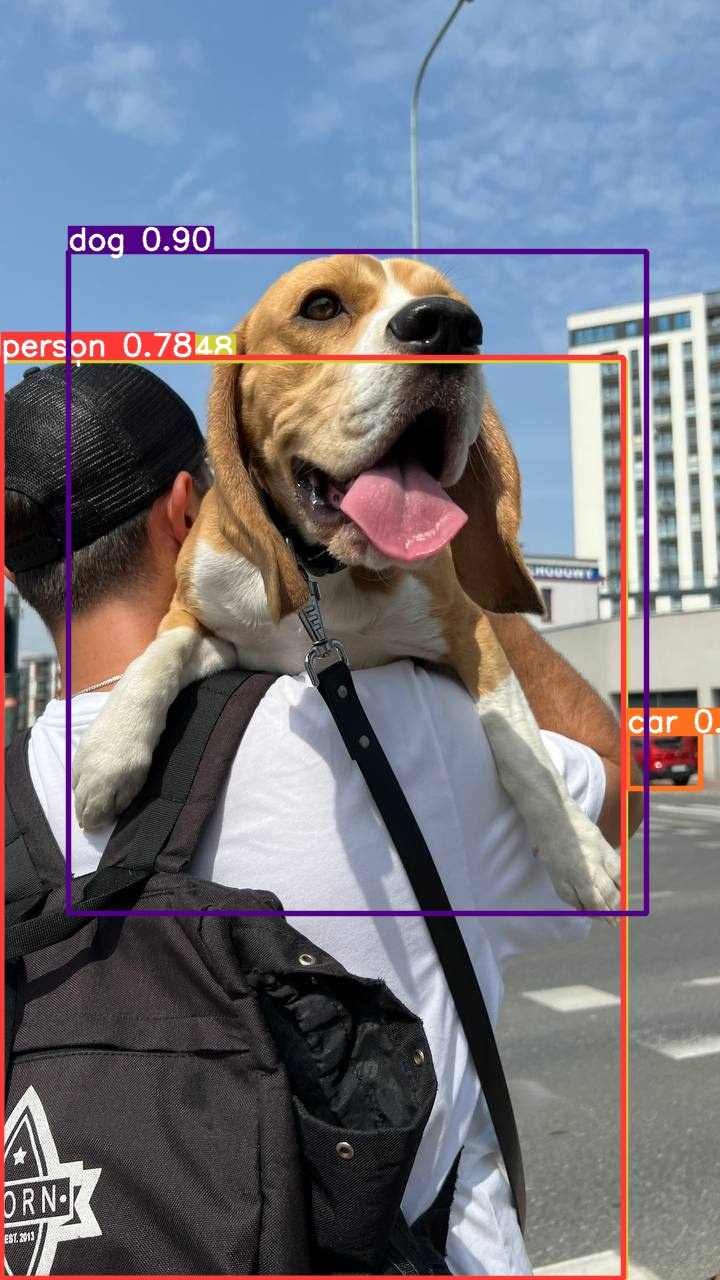

In [15]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/detect/exp2/dog.jpeg", width=600)

## Lets download our dataset from Roboflow which I have annotated
- https://universe.roboflow.com/kgup/mcqueen-f4nrv

In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="REDACTED")
project = rf.workspace("kgup").project("mcqueen-f4nrv")
version = project.version(1)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installati


Extracting Dataset Version Zip to Mcqueen-1 in yolov9:: 100%|██████████| 125/125 [00:00<00:00, 7349.87it/s]


### As I have only one class (mcqueen), I have changed the number of classes to 1 in yolov9-c.yaml under detect

In [22]:
!python train_dual.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

train_dual: weights=/yolov9/weights/yolov9-c.pt, cfg=models/detect/yolov9-c.yaml, data=/yolov9/Mcqueen-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA RTX A5000, 22721MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, cls_pw=1.0, obj=0.7, obj_pw=1.0, dfl=1.5, iou_t=0.2

In [23]:
!ls {HOME}/runs/train/exp/

F1_curve.png					    opt.yaml
PR_curve.png					    results.csv
P_curve.png					    results.png
R_curve.png					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1716461148.3a338c92d807.4315.0  train_batch2.jpg
hyp.yaml					    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
labels_correlogram.jpg				    weights


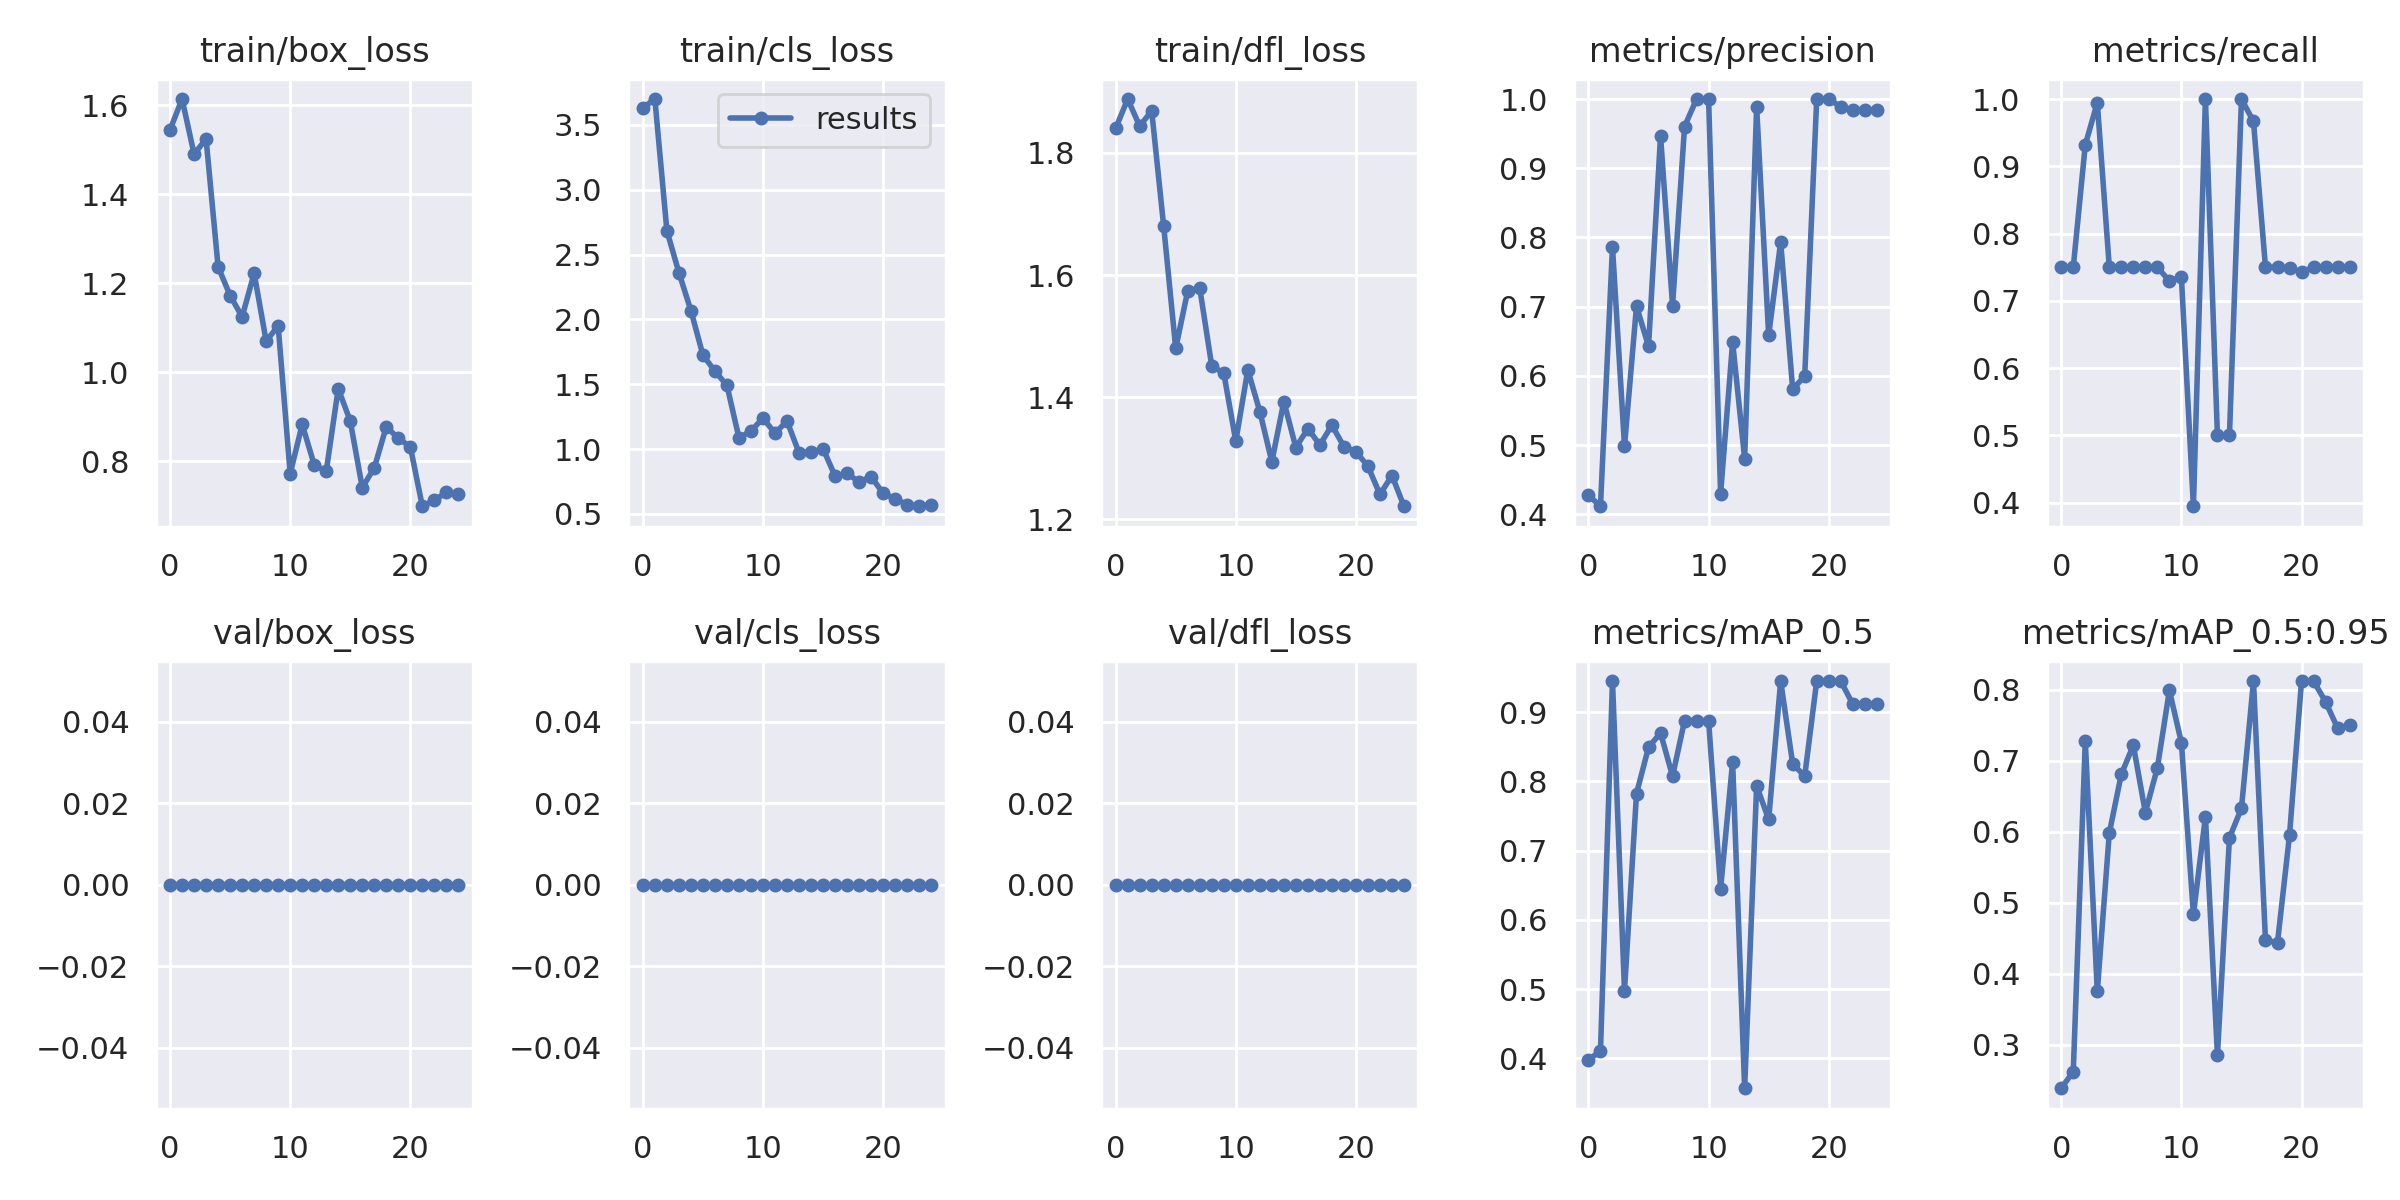

In [24]:
Image(filename=f"{HOME}/runs/train/exp/results.png", width=1000)

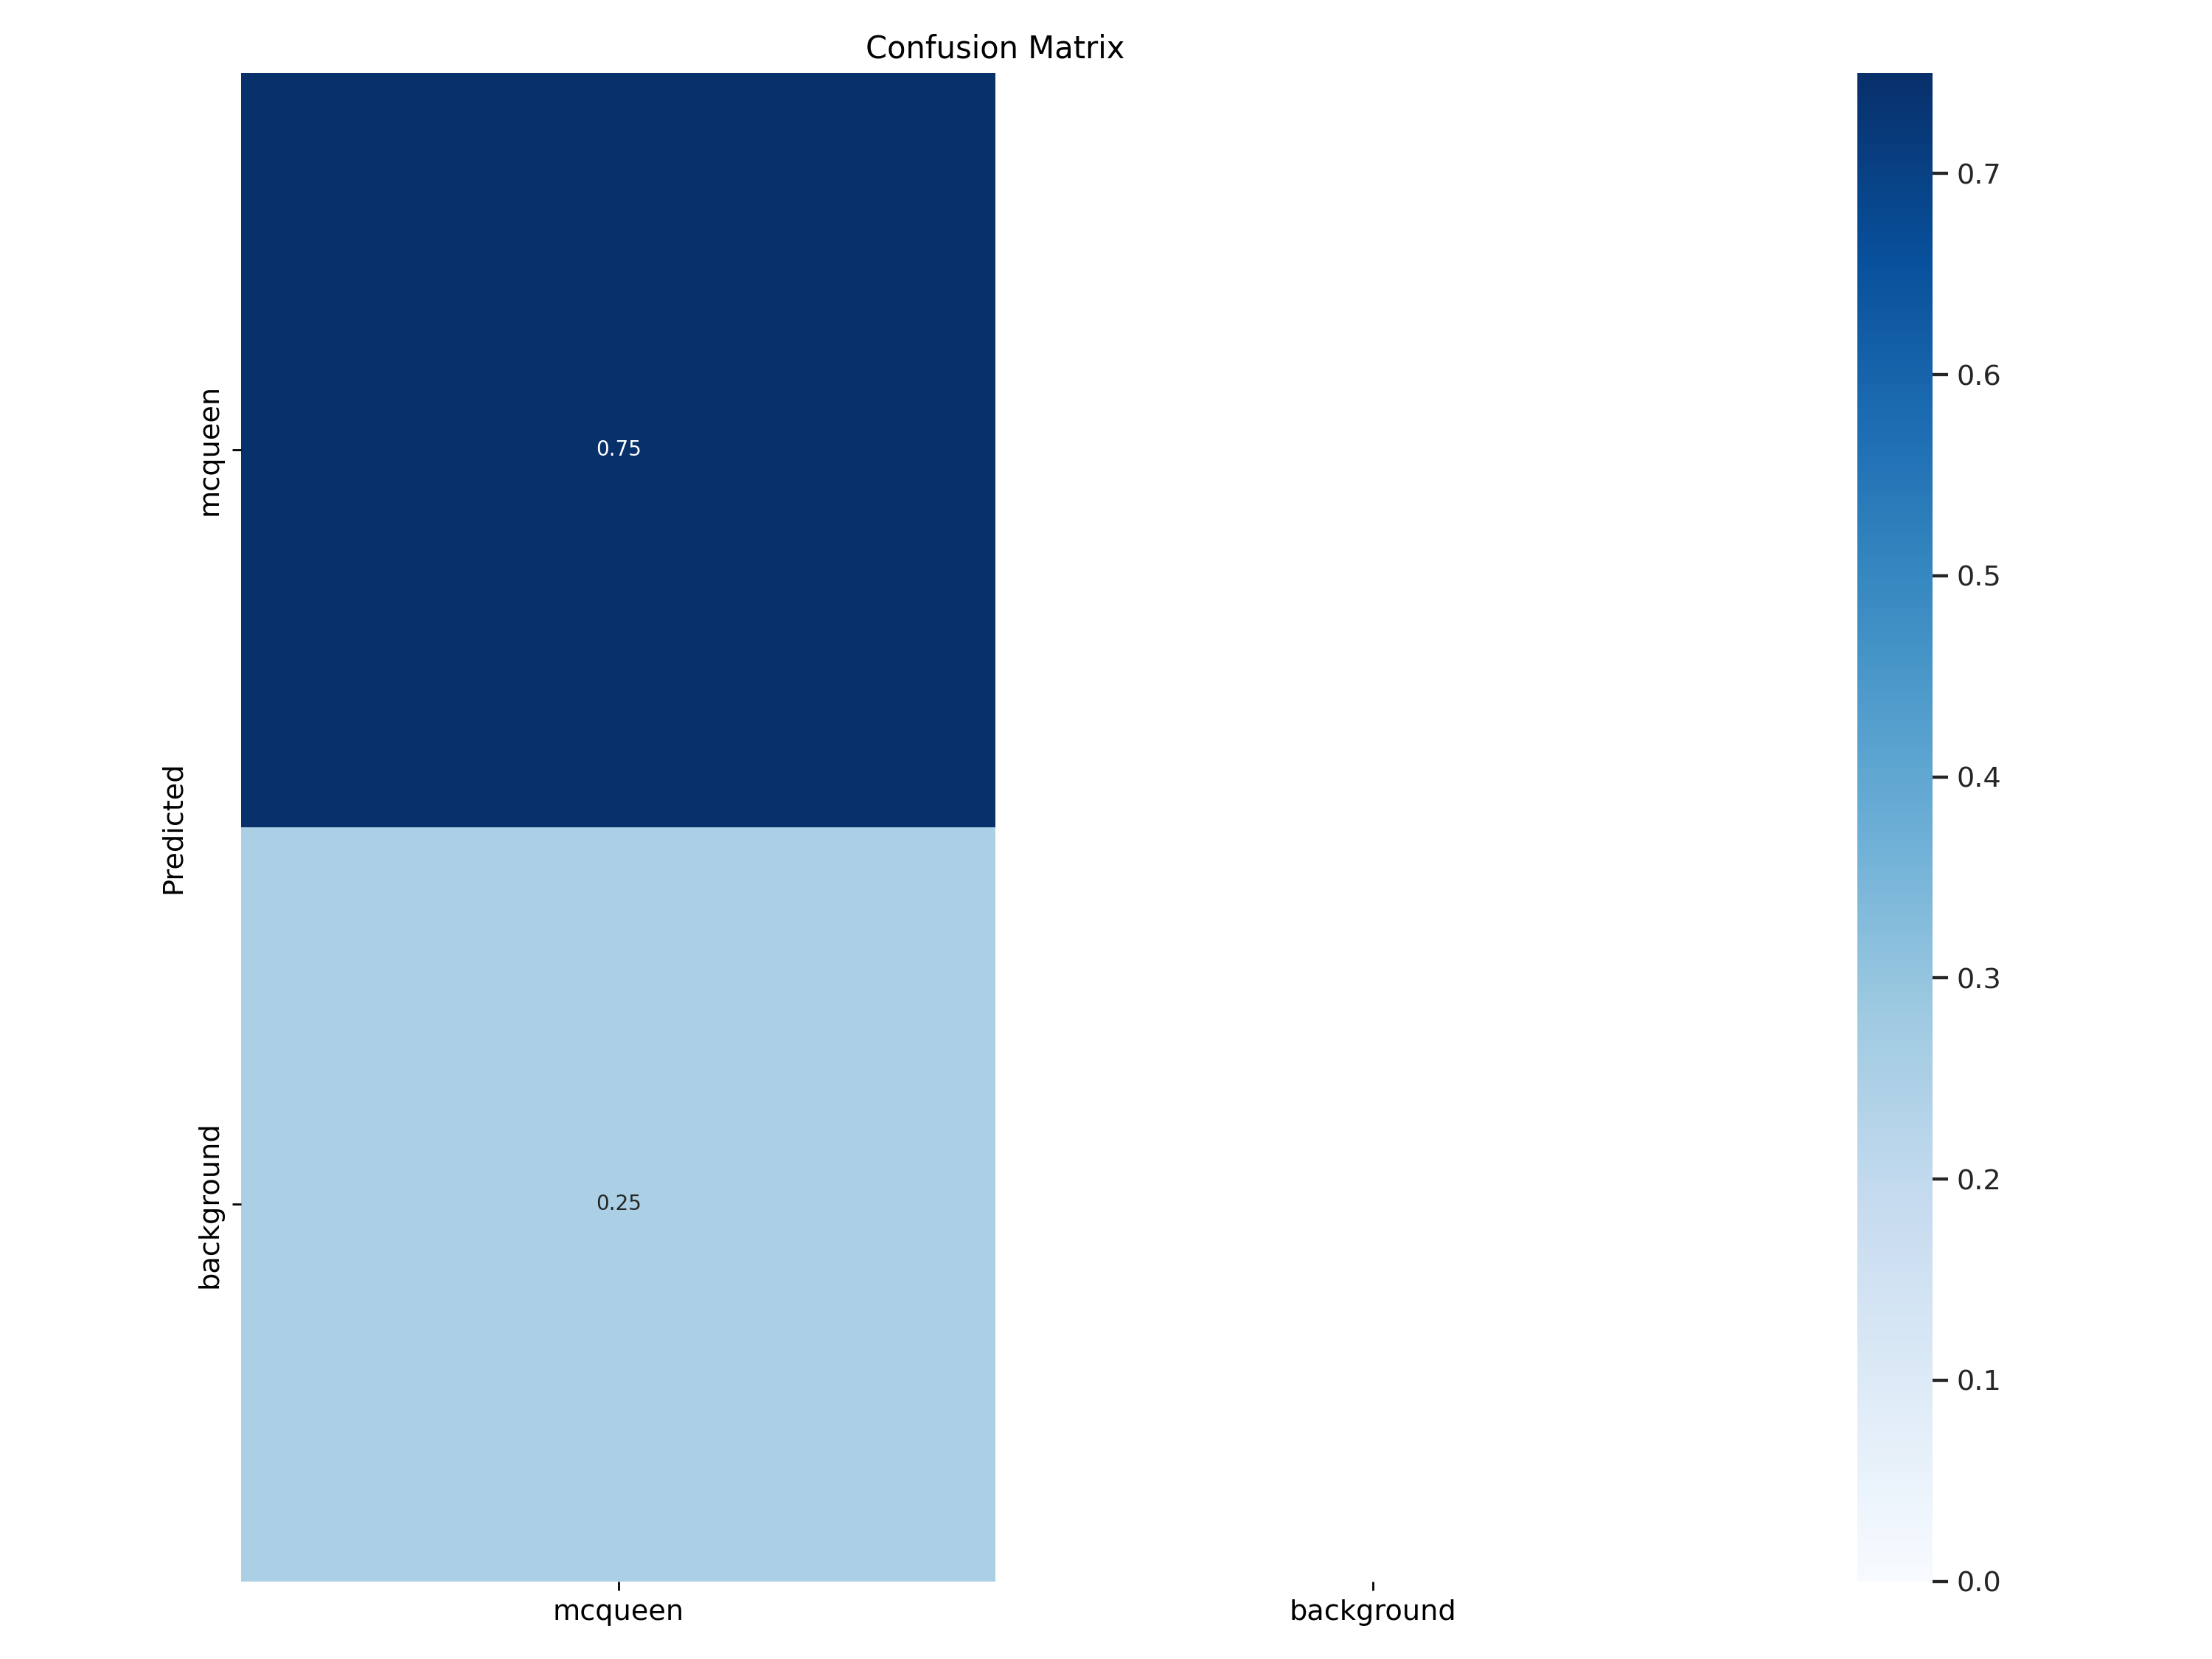

In [25]:
Image(filename=f"{HOME}/runs/train/exp/confusion_matrix.png", width=1000)

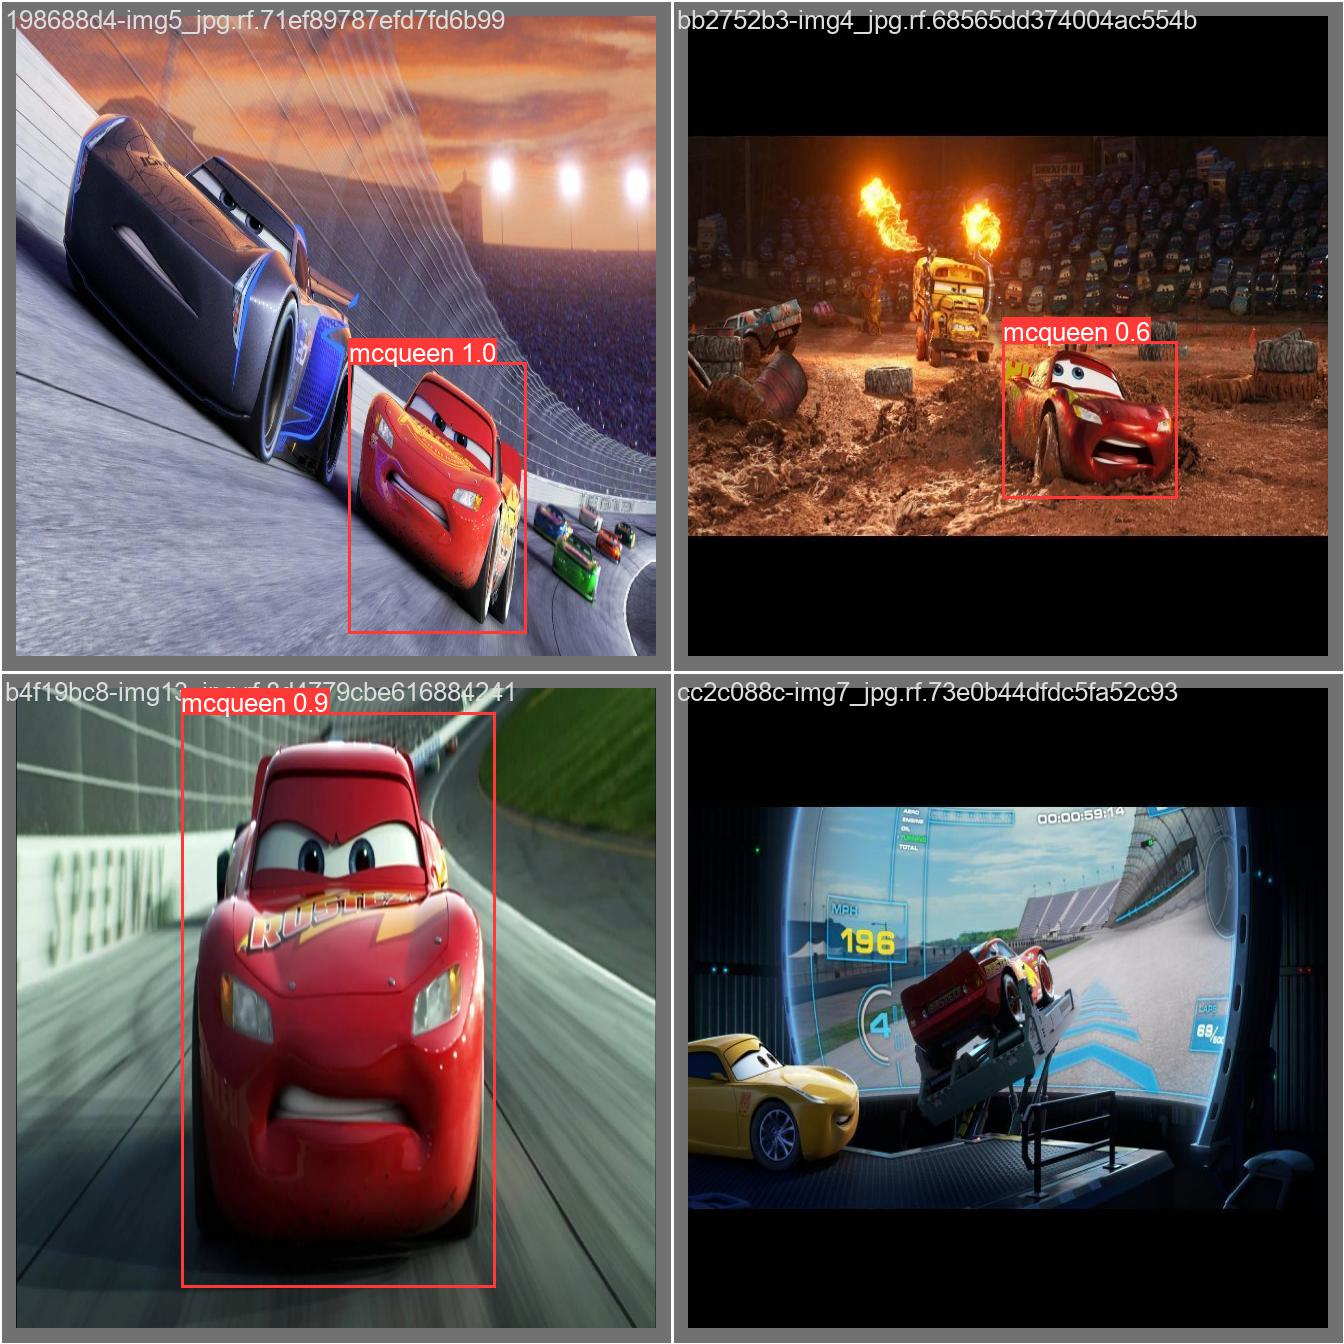

In [27]:
Image(filename=f"{HOME}/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Detection on random image

In [28]:
!wget -P {HOME}/data -q 'https://d23.com/app/uploads/2022/08/00_news-brief-080522_1180w-600hclean.jpg' -O 'mcqueen.jpg'

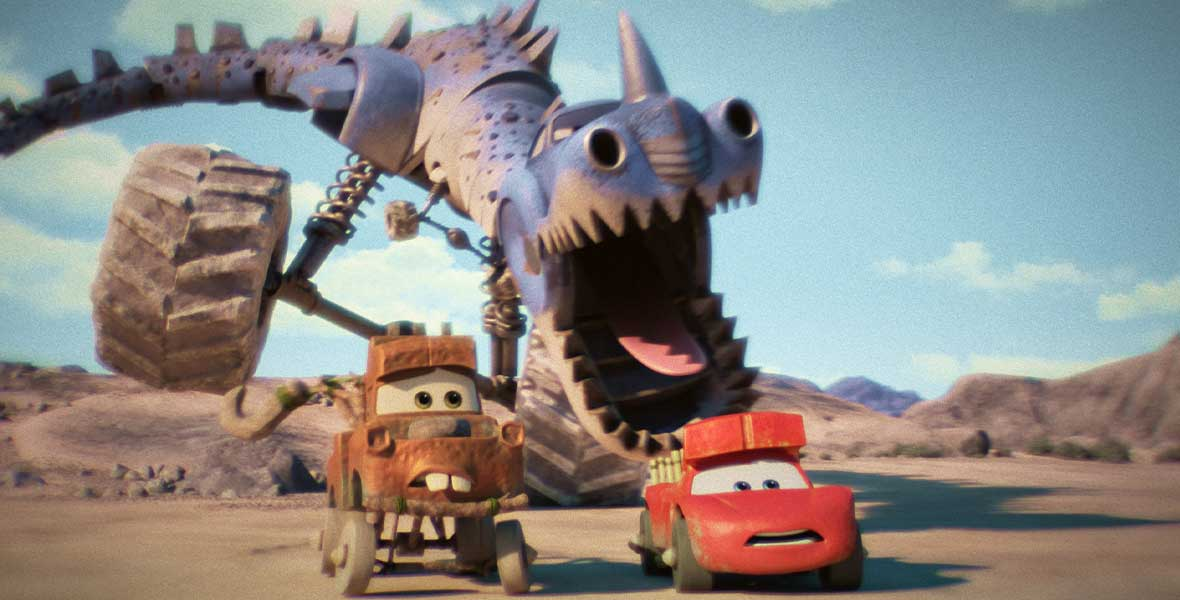

In [30]:
Image(filename=f"{HOME}/mcqueen.jpg", width=600)

In [31]:
!python detect.py --weights {HOME}/runs/train/exp/weights/best.pt --source '{HOME}/mcqueen.jpg' --device 0

detect: weights=['/yolov9/runs/train/exp/weights/best.pt'], source=/yolov9/mcqueen.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA RTX A5000, 22721MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50698278 parameters, 0 gradients, 236.6 GFLOPs
image 1/1 /yolov9/mcqueen.jpg: 352x640 1 mcqueen, 188.1ms
Speed: 0.3ms pre-process, 188.1ms inference, 382.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


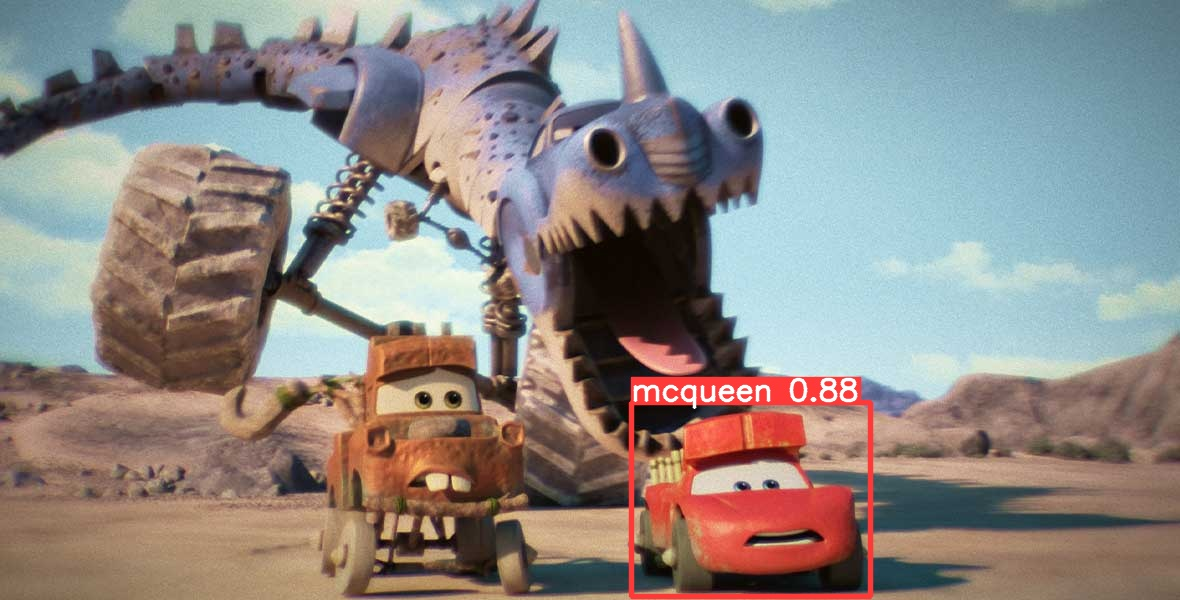

In [32]:
Image(filename=f"{HOME}/runs/detect/exp3/mcqueen.jpg", width=600)